<a href="https://colab.research.google.com/github/idubey-code/cs480student/blob/main/CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

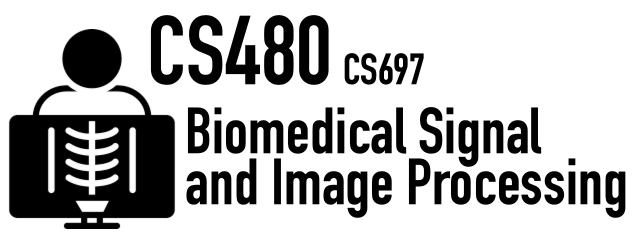
# Assignment 1


In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [20]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

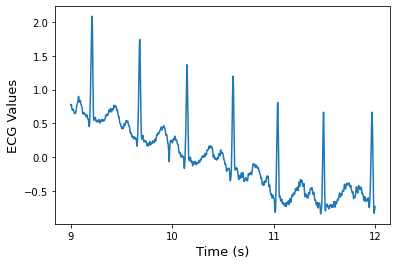

In [21]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

import numpy as np
import matplotlib.pyplot as plt

data9to11 = ecg[8*SAMPLING_RATE:11*SAMPLING_RATE]
time = np.arange(data9to11.size)/SAMPLING_RATE

plt.plot(time,data9to11);
plt.xlabel("Time (s)",fontsize=13,va='top');
plt.ylabel("ECG Values",fontsize=13,);
plt.xticks(np.arange(4),[9, 10, 11, 12]);

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [22]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [23]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [24]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [25]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


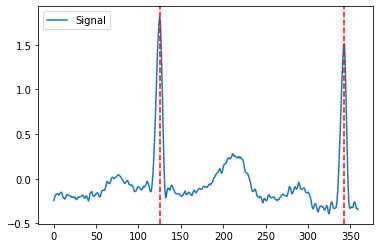

In [26]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

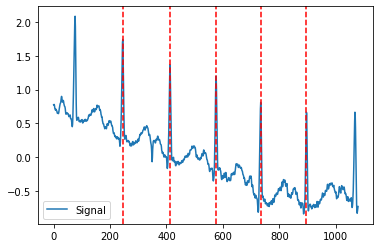

In [27]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

_, rpeaks2 = nk.ecg_peaks(ecg[8*SAMPLING_RATE:11*SAMPLING_RATE], sampling_rate=SAMPLING_RATE)
plot = nk.events_plot(rpeaks2['ECG_R_Peaks'], ecg[8*SAMPLING_RATE:11*SAMPLING_RATE])

**Task 3:** Detect Heartrate. [15 Points]

In [28]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

##No, the patient does not have a regular heart rate. Looking at the R peaks the heart rate of the patient is very fast.

**Task 4:** Detect P Q S T Peaks. [25 Points]

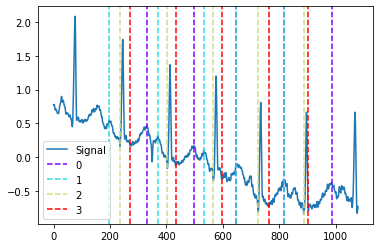

In [29]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

_, waves_peak = nk.ecg_delineate(data9to11, rpeaks2, sampling_rate=SAMPLING_RATE, method="peak")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], data9to11)

In [30]:
# TODO Does the detection work well?

## The detection works decent but is not completely accurate as there is a shift in P, Q, R ,S & T peaks.



**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

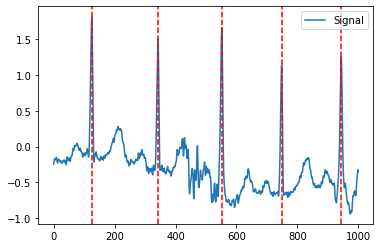

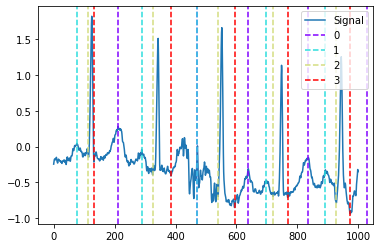

In [31]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

_, rpeaks3 = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)
plot = nk.events_plot(rpeaks3['ECG_R_Peaks'][:5], ecg[:1000])

_, waves_peak2 = nk.ecg_delineate(ecg, rpeaks3, sampling_rate=SAMPLING_RATE, method="peak")
plot = nk.events_plot([waves_peak2['ECG_T_Peaks'][:5],
                       waves_peak2['ECG_P_Peaks'][:5],
                       waves_peak2['ECG_Q_Peaks'][:5],
                       waves_peak2['ECG_S_Peaks'][:5]], ecg[:1000])

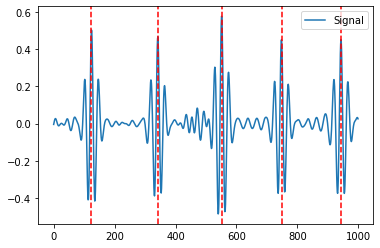

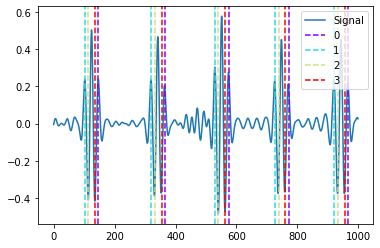

In [32]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

ecg_filtered = nk.signal_filter(ecg,sampling_rate=SAMPLING_RATE,lowcut=12,highcut=20)
_, rpeaks4 = nk.ecg_peaks(ecg_filtered, sampling_rate=SAMPLING_RATE)
plot = nk.events_plot(rpeaks4['ECG_R_Peaks'][:5], ecg_filtered[:1000])

_, waves_peak3 = nk.ecg_delineate(ecg_filtered, rpeaks4, sampling_rate=SAMPLING_RATE, method="peak")
plot = nk.events_plot([waves_peak3['ECG_T_Peaks'][:5],
                       waves_peak3['ECG_P_Peaks'][:5],
                       waves_peak3['ECG_Q_Peaks'][:5],
                       waves_peak3['ECG_S_Peaks'][:5]], ecg_filtered[:1000])

In [33]:
# TODO Does the filtering improve the result?

#The filtering definitely improved the results as the P, Q, R, S & T peaks are more accurately positioned.

In [34]:

# Great job!!

#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
# jgs       '(  (..-'
#            '-'


#References


*   Collaboration: Akshay Deshmukh
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.electrocardiogram.html
*   https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset



